## Load anamnesis from files

In [68]:
import numpy as np
import pandas as pd
import re

In [69]:
PATH_TO_ANAMNESIS_DATA = "../../data/anamnesis/source/ru_med_prime_data_corpus/RuMedPrimeData.tsv"

In [70]:
df = pd.read_csv(PATH_TO_ANAMNESIS_DATA, sep='\t', header=0)

In [71]:
df

,symptoms,anamnesis,icd10,new_patient_id,new_event_id,new_event_time
0,"Сухость кожи, мышечная слабость, нарушение мен...",Месяц назад сильный стресс и на этом фоне появ...,E01.8,qf156c36,q5fc2cb1,2027-05-19
1,"Жалобы ГБ: головная боль, головокружение на фо...","Начало острое, постепенное, после переохлажден...",J06.9,q9321cf8,qe173f20,2023-03-24
2,"головная боль, озноб, насморк, легкая заложенн...","Начало острое, *ДАТА* после переохлаждения. Пр...",J00,qcbc06c5,q653efaa,2026-12-22
3,"На изжога периодически , отрыжка воздухом, . б...",Впервые пояились вышеизложенные жалобы в течен...,K21.0,qfd53b1f,qe48681b,2026-01-15
4,"- лабильность настроения, плаксивость.","Тиреоидэктомия в*ДАТА* по поводу МУЗ, по гисто...",E89.0,q783a54b,q4109cab,2021-05-28
...,...,...,...,...,...,...
7620,"Насморк,затек слизи по задней стенке.Высыпания...",Жалобы беспокоят длительное время.Ранее провод...,J30.4,qde5e742,q4912d3a,2029-08-31
7621,"на одышку в покое, при незначительной физическ...",Прилетеле из *ГОРОД* *ДАТА*: Контакт в ковид 1...,J45.8,qccbecbb,q820290c,2022-03-10
7622,на периодическую боль в поясничной области,"В анамнезе хронический пиелонефрит, остеохондр...",M54.5,qa7329b1,qbf52ccd,2023-08-29
7623,"Боли в левом плечевом суставе, усилив. в полож...",Боли в суставах с *ДАТА*.- боли в т\бедренных ...,M19.0,q4b59a12,q45ad846,2023-01-10


In [72]:
df.drop(columns=["icd10","new_event_id", "new_patient_id", "new_event_time"], inplace=True)

In [73]:
len(df)

7625

In [74]:
df_symptoms = df.symptoms
df_anamnesis = df.anamnesis

In [75]:
df_symptoms

0       Сухость кожи, мышечная слабость, нарушение мен...
1       Жалобы ГБ: головная боль, головокружение на фо...
2       головная боль, озноб, насморк, легкая заложенн...
3       На изжога периодически , отрыжка воздухом, . б...
4                  - лабильность настроения, плаксивость.
                              ...                        
7620    Насморк,затек слизи по задней стенке.Высыпания...
7621    на одышку в покое, при незначительной физическ...
7622           на периодическую боль в поясничной области
7623    Боли в левом плечевом суставе, усилив. в полож...
7624    Боли в ПОП, с иррадиацией в правую боковую обл...
Name: symptoms, Length: 7625, dtype: object

In [76]:
df = pd.concat([df_symptoms, df_anamnesis])

In [77]:
df = df.to_frame(name="data")

In [78]:
df.reset_index(drop=True, inplace=True)

In [79]:
df

,data
0,"Сухость кожи, мышечная слабость, нарушение мен..."
1,"Жалобы ГБ: головная боль, головокружение на фо..."
2,"головная боль, озноб, насморк, легкая заложенн..."
3,"На изжога периодически , отрыжка воздухом, . б..."
4,"- лабильность настроения, плаксивость."
...,...
15245,Жалобы беспокоят длительное время.Ранее провод...
15246,Прилетеле из *ГОРОД* *ДАТА*: Контакт в ковид 1...
15247,"В анамнезе хронический пиелонефрит, остеохондр..."
15248,Боли в суставах с *ДАТА*.- боли в т\бедренных ...


## Tokenize anamnesis texts

Let's tokenize anamnesis

In [80]:
!pip install mosestokenizer

You should consider upgrading via the '/home/Dmitry.Pogrebnoy/Desktop/MedSpellChecker/venv/bin/python -m pip install --upgrade pip' command.


In [81]:
from mosestokenizer import MosesTokenizer
tokenize = MosesTokenizer(lang="ru")

In [82]:
all_anamnesis_tokens = [tokenize(text) for text in df.data]

In [83]:
df["tokens"] = all_anamnesis_tokens

In [84]:
df["tokens"]

0        [Сухость, кожи, ,, мышечная, слабость, ,, нару...
1        [Жалобы, ГБ, :, головная, боль, ,, головокруже...
2        [головная, боль, ,, озноб, ,, насморк, ,, легк...
3        [На, изжога, периодически, ,, отрыжка, воздухо...
4          [-, лабильность, настроения, ,, плаксивость, .]
                               ...                        
15245    [Жалобы, беспокоят, длительное, время.Ранее, п...
15246    [Прилетеле, из, *, ГОРОД, *, *, ДАТА, *, :, Ко...
15247    [В, анамнезе, хронический, пиелонефрит, ,, ост...
15248    [Боли, в, суставах, с, *, ДАТА, *, .-, боли, в...
15249    [С, *, ДАТА, *, появились, боли, в, ПОП, ,, с,...
Name: tokens, Length: 15250, dtype: object

## Filter tokens and make some analyse of words count distribution

Let's filter tokens

In [85]:
df["tokens_size"] = [len(tokens) for tokens in df["tokens"]]

<AxesSubplot:>

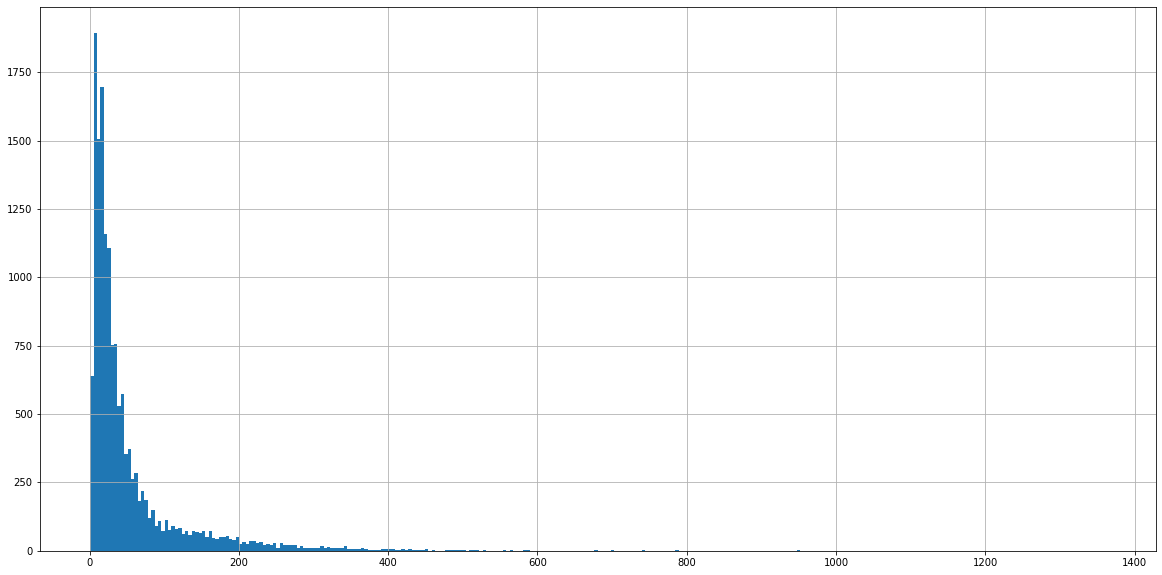

In [86]:
df["tokens_size"].hist(bins=300, figsize=(20,10))

In [104]:
# Filter words with any non-сyrillic character
def filter_invalid_token(token_list):
    return [token.lower() for token in token_list if (not re.search("[^а-яА-Я]", token)) & (not token.isupper()) & (not re.search("\*.*?\*", token))]

In [105]:
df["filtered_tokens"] = [filter_invalid_token(tokens) for tokens in df["tokens"]]

In [106]:
df["filtered_tokens"]

0        [сухость, кожи, мышечная, слабость, нарушение,...
1        [жалобы, головная, боль, головокружение, на, ф...
2        [головная, боль, озноб, насморк, легкая, залож...
3        [на, изжога, периодически, отрыжка, воздухом, ...
4                   [лабильность, настроения, плаксивость]
                               ...                        
15245    [жалобы, беспокоят, длительное, проводились, в...
15246    [прилетеле, из, контакт, в, ковид, отрицает, н...
15247    [анамнезе, хронический, пиелонефрит, остеохонд...
15248    [боли, в, суставах, с, боли, в, т, бедренных, ...
15249    [появились, боли, в, с, в, правую, ягодичную, ...
Name: filtered_tokens, Length: 15250, dtype: object

In [107]:
df["filtered_tokens_size"] = [len(tokens) for tokens in df["filtered_tokens"]]

<AxesSubplot:>

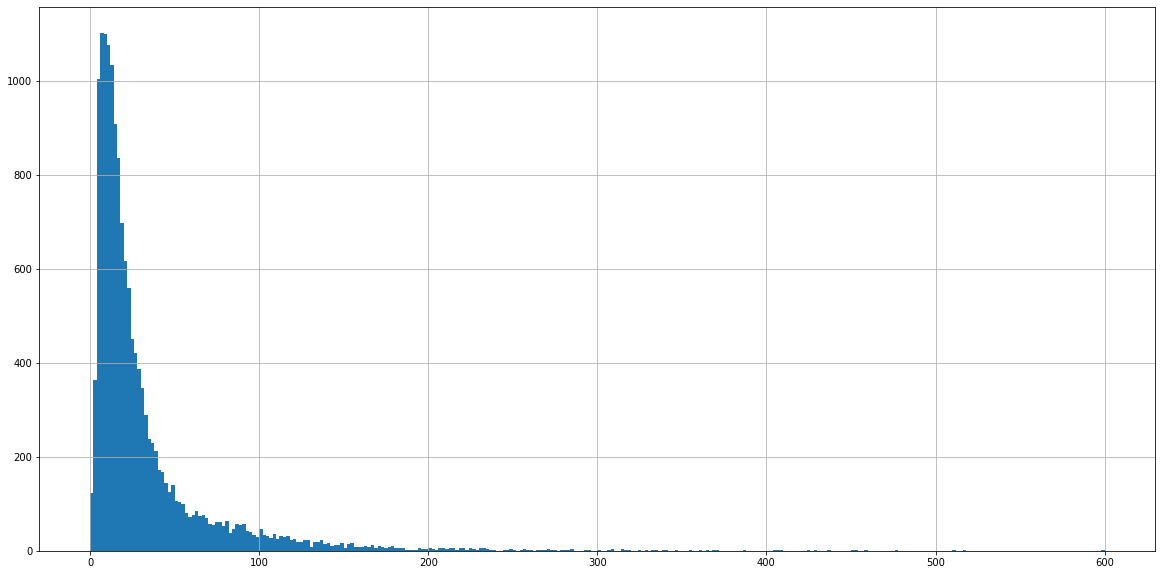

In [108]:
df["filtered_tokens_size"].hist(bins=300, figsize=(20,10))

In [109]:
quantile_levels = [.25,.5,.75,.9,.95,.99]
filtered_tokens_size_quantiles = df["filtered_tokens_size"].quantile(quantile_levels)
filtered_tokens_size_quantiles

0.25     10.0
0.50     18.0
0.75     34.0
0.90     74.0
0.95    108.0
0.99    201.0
Name: filtered_tokens_size, dtype: float64

In [110]:
df["filtered_tokens_size"].value_counts()

8      578
10     576
7      567
5      546
6      535
      ... 
387      1
246      1
268      1
271      1
269      1
Name: filtered_tokens_size, Length: 294, dtype: int64

Check anamnesis with extremely low word counts

In [111]:
df[df["filtered_tokens_size"] <= 11]

,data,tokens,tokens_size,filtered_tokens,filtered_tokens_size
0,"Сухость кожи, мышечная слабость, нарушение мен...","[Сухость, кожи, ,, мышечная, слабость, ,, нару...",17,"[сухость, кожи, мышечная, слабость, нарушение,...",11
4,"- лабильность настроения, плаксивость.","[-, лабильность, настроения, ,, плаксивость, .]",6,"[лабильность, настроения, плаксивость]",3
11,у перепады настроения редкие приступы МА АД в ...,"[у, перепады, настроения, редкие, приступы, МА...",16,"[у, перепады, настроения, редкие, приступы, в,...",7
24,"жалобы на нарушение сна, снижение памяти на не...","[жалобы, на, нарушение, сна, ,, снижение, памя...",16,"[жалобы, на, нарушение, сна, снижение, памяти,...",11
27,"Жалобы на снижение концентрации внимания, труд...","[Жалобы, на, снижение, концентрации, внимания,...",11,"[жалобы, на, снижение, концентрации, внимания,...",9
...,...,...,...,...,...
15209,больна в течение 6 мес,"[больна, в, течение, 6, мес]",5,"[больна, в, течение, мес]",4
15212,болен в течение месяца СГМ (6 лет назад),"[болен, в, течение, месяца, СГМ, (, 6, лет, на...",10,"[болен, в, течение, месяца, лет, назад]",6
15215,прошла курс лечения ринофарингита,"[прошла, курс, лечения, ринофарингита]",4,"[прошла, курс, лечения, ринофарингита]",4
15246,Прилетеле из *ГОРОД* *ДАТА*: Контакт в ковид 1...,"[Прилетеле, из, *, ГОРОД, *, *, ДАТА, *, :, Ко...",17,"[прилетеле, из, контакт, в, ковид, отрицает, н...",8


In [112]:
df = df[df["filtered_tokens_size"] != 0]
df

,data,tokens,tokens_size,filtered_tokens,filtered_tokens_size
0,"Сухость кожи, мышечная слабость, нарушение мен...","[Сухость, кожи, ,, мышечная, слабость, ,, нару...",17,"[сухость, кожи, мышечная, слабость, нарушение,...",11
1,"Жалобы ГБ: головная боль, головокружение на фо...","[Жалобы, ГБ, :, головная, боль, ,, головокруже...",61,"[жалобы, головная, боль, головокружение, на, ф...",37
2,"головная боль, озноб, насморк, легкая заложенн...","[головная, боль, ,, озноб, ,, насморк, ,, легк...",27,"[головная, боль, озноб, насморк, легкая, залож...",15
3,"На изжога периодически , отрыжка воздухом, . б...","[На, изжога, периодически, ,, отрыжка, воздухо...",33,"[на, изжога, периодически, отрыжка, воздухом, ...",23
4,"- лабильность настроения, плаксивость.","[-, лабильность, настроения, ,, плаксивость, .]",6,"[лабильность, настроения, плаксивость]",3
...,...,...,...,...,...
15245,Жалобы беспокоят длительное время.Ранее провод...,"[Жалобы, беспокоят, длительное, время.Ранее, п...",43,"[жалобы, беспокоят, длительное, проводились, в...",24
15246,Прилетеле из *ГОРОД* *ДАТА*: Контакт в ковид 1...,"[Прилетеле, из, *, ГОРОД, *, *, ДАТА, *, :, Ко...",17,"[прилетеле, из, контакт, в, ковид, отрицает, н...",8
15247,"В анамнезе хронический пиелонефрит, остеохондр...","[В, анамнезе, хронический, пиелонефрит, ,, ост...",7,"[анамнезе, хронический, пиелонефрит, остеохонд...",4
15248,Боли в суставах с *ДАТА*.- боли в т\бедренных ...,"[Боли, в, суставах, с, *, ДАТА, *, .-, боли, в...",305,"[боли, в, суставах, с, боли, в, т, бедренных, ...",141


Check anamnesis with many tokens

In [114]:
for tokens in df[df["filtered_tokens_size"] > 201]["filtered_tokens"]:
    print(tokens)

['тянуще', 'ноющие', 'боли', 'в', 'левой', 'подвздошной', 'области', 'в', 'первый', 'день', 'цикла', 'иногда', 'не', 'связано', 'с', 'менструацией', 'данные', 'боли', 'беспокоят', 'более', 'лет', 'усилились', 'последние', 'года', 'обращалась', 'с', 'этой', 'же', 'проблемой', 'после', 'курса', 'дюспаталина', 'лонгидазы', 'траумеля', 'боли', 'прошли', 'и', 'с', 'так', 'же', 'часто', 'беспокоит', 'умеренный', 'зуд', 'вульвы', 'в', 'настоящее', 'время', 'в', 'том', 'числе', 'цитология', 'с', 'шейки', 'матки', 'от', 'без', 'патологии', 'мазок', 'на', 'флору', 'влагалища', 'от', 'без', 'патологии', 'от', 'от', 'ммед', 'мл', 'пролактин', 'мед', 'л', 'норма', 'до', 'пмоль', 'л', 'мед', 'л', 'от', 'на', 'й', 'день', 'менструального', 'цикла', 'размеры', 'матки', 'контуры', 'ее', 'неровные', 'миометрий', 'неоднороден', 'дне', 'матки', 'определяется', 'миоматозный', 'узел', 'по', 'передней', 'стенке', 'интрамуральный', 'гипоэхогенный', 'миоматозный', 'узел', 'и', 'субсерозный', 'узел', 'срединное

It's ok

## Try to detect stopwords for anamnesis by tf-idf metric

Let's find stopwords by tf-idf to filter it out

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [116]:
tf_idf_vectorizer = TfidfVectorizer()

In [117]:
filtered_tokens_string = df["filtered_tokens"].apply(lambda x: " ".join(x))
filtered_tokens_string

0        сухость кожи мышечная слабость нарушение менст...
1        жалобы головная боль головокружение на фое пов...
2        головная боль озноб насморк легкая заложенност...
3        на изжога периодически отрыжка воздухом боли ж...
4                       лабильность настроения плаксивость
                               ...                        
15245    жалобы беспокоят длительное проводились выявле...
15246    прилетеле из контакт в ковид отрицает не повыш...
15247        анамнезе хронический пиелонефрит остеохондроз
15248    боли в суставах с боли в т бедренных суставах ...
15249    появились боли в с в правую ягодичную наблюдал...
Name: filtered_tokens, Length: 15152, dtype: object

In [118]:
tf_idf_vectorizer = tf_idf_vectorizer.fit(filtered_tokens_string)

In [119]:
feature_names_string = " ".join(tf_idf_vectorizer.get_feature_names_out())
feature_names_string

'аа аавскулярное аалергический аан аанлизам аанлизов аб абакавир абдоминальная абдоминального абдоминальный абдоминальных абиотрофии аблации аблация аблбюдается абляция абмулаторно аболи аборт аборта абортами абортуса аборты аботала абрамовой абрать абрек абс абсансные абсансов абсансы абсолютного абсолютный абсолютным абсцесс абсцесса абсцессе абсцессы абузусная абцессов ав авалор авамис аварии аварию авария аваскул аваскулярная аваскулярное аваскулярные аваскулярный аваскулярных авг август августа августе авидность авиценна авм авмоболильную аврийная авто автоаварии автоавария автобуса автобусе автодорожное автозаправке автокатастрофа автоматизмами автомобильная автомобиля автошколе аг агалатес агалатеса агализамк агафья агенезия агиомиолипома аглютинация агне агниография агониста агонистами агонистов агонистор агонисты агрессивность агрессии агрессия агс ад адаптации адаптирована адаптировано адаптол адванс адванса адвантан адвантаном адгезивной адгезивный адгезиолизис адгезиолизиса

In [120]:
tf_idf_matrix = tf_idf_vectorizer.transform([feature_names_string])
tf_idf_array = tf_idf_matrix.toarray().flatten()
tf_idf_array

array([0.00637504, 0.00637504, 0.00637504, ..., 0.00637504, 0.00637504,
       0.00611481])

In [121]:
feature_names_with_tf_idf = np.array([tf_idf_vectorizer.get_feature_names_out(), tf_idf_array]).transpose()

In [122]:
tf_idf_df = pd.DataFrame(feature_names_with_tf_idf, columns=["word","tf-idf"])
tf_idf_df

,word,tf-idf
0,аа,0.006375
1,аавскулярное,0.006375
2,аалергический,0.006375
3,аан,0.006375
4,аанлизам,0.00567
...,...,...
28121,ячмень,0.00593
28122,ячмини,0.006375
28123,ячника,0.006375
28124,ячнике,0.006375


In [123]:
sorted_tf_idf_df = tf_idf_df.sort_values("tf-idf", ascending=True, ignore_index=True)
sorted_tf_idf_df

,word,tf-idf
0,на,0.001133
1,боли,0.001439
2,по,0.001559
3,не,0.001588
4,от,0.001662
...,...,...
28121,неорал,0.006375
28122,неопрятность,0.006375
28123,неопределенный,0.006375
28124,неосложгненная,0.006375


## Use stopwords from nltk

So it's too strange, and I mess to find any good threshold for define stop words list
Therefore we will use common stopwords from nltk lib.

In [124]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/Dmitry.Pogrebnoy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [125]:
from nltk.corpus import stopwords
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

Let's use common nltk stopwords for russian and filter it out from anamnesis

In [126]:
df["filtered_tokens_without_nltk_stopwords"] = df["filtered_tokens"].apply(lambda x: list(filter(lambda item: item not in stopwords.words('russian'), x)))
df.head()

/tmp/ipykernel_18708/1978698187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filtered_tokens_without_nltk_stopwords"] = df["filtered_tokens"].apply(lambda x: list(filter(lambda item: item not in stopwords.words('russian'), x)))


,data,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords
0,"Сухость кожи, мышечная слабость, нарушение мен...","[Сухость, кожи, ,, мышечная, слабость, ,, нару...",17,"[сухость, кожи, мышечная, слабость, нарушение,...",11,"[сухость, кожи, мышечная, слабость, нарушение,..."
1,"Жалобы ГБ: головная боль, головокружение на фо...","[Жалобы, ГБ, :, головная, боль, ,, головокруже...",61,"[жалобы, головная, боль, головокружение, на, ф...",37,"[жалобы, головная, боль, головокружение, фое, ..."
2,"головная боль, озноб, насморк, легкая заложенн...","[головная, боль, ,, озноб, ,, насморк, ,, легк...",27,"[головная, боль, озноб, насморк, легкая, залож...",15,"[головная, боль, озноб, насморк, легкая, залож..."
3,"На изжога периодически , отрыжка воздухом, . б...","[На, изжога, периодически, ,, отрыжка, воздухо...",33,"[на, изжога, периодически, отрыжка, воздухом, ...",23,"[изжога, периодически, отрыжка, воздухом, боли..."
4,"- лабильность настроения, плаксивость.","[-, лабильность, настроения, ,, плаксивость, .]",6,"[лабильность, настроения, плаксивость]",3,"[лабильность, настроения, плаксивость]"


In [127]:
df["filtered_tokens_without_nltk_stopwords_size"] = df["filtered_tokens_without_nltk_stopwords"].apply(lambda x: len(x))
df.head()

/tmp/ipykernel_18708/687987149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filtered_tokens_without_nltk_stopwords_size"] = df["filtered_tokens_without_nltk_stopwords"].apply(lambda x: len(x))


,data,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size
0,"Сухость кожи, мышечная слабость, нарушение мен...","[Сухость, кожи, ,, мышечная, слабость, ,, нару...",17,"[сухость, кожи, мышечная, слабость, нарушение,...",11,"[сухость, кожи, мышечная, слабость, нарушение,...",10
1,"Жалобы ГБ: головная боль, головокружение на фо...","[Жалобы, ГБ, :, головная, боль, ,, головокруже...",61,"[жалобы, головная, боль, головокружение, на, ф...",37,"[жалобы, головная, боль, головокружение, фое, ...",30
2,"головная боль, озноб, насморк, легкая заложенн...","[головная, боль, ,, озноб, ,, насморк, ,, легк...",27,"[головная, боль, озноб, насморк, легкая, залож...",15,"[головная, боль, озноб, насморк, легкая, залож...",13
3,"На изжога периодически , отрыжка воздухом, . б...","[На, изжога, периодически, ,, отрыжка, воздухо...",33,"[на, изжога, периодически, отрыжка, воздухом, ...",23,"[изжога, периодически, отрыжка, воздухом, боли...",18
4,"- лабильность настроения, плаксивость.","[-, лабильность, настроения, ,, плаксивость, .]",6,"[лабильность, настроения, плаксивость]",3,"[лабильность, настроения, плаксивость]",3


## Lemmatization

Also, we need to perform lemmatization for anamnesis words

In [128]:
import pymorphy2
lemmatizer = pymorphy2.MorphAnalyzer()

In [129]:
df["filtered_tokens_without_nltk_stopwords_with_lemmatization"] = \
    df["filtered_tokens_without_nltk_stopwords"].apply(lambda words: list(map(lambda word: lemmatizer.parse(word)[0].normal_form, words)))
df.head()

/tmp/ipykernel_18708/1733179443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filtered_tokens_without_nltk_stopwords_with_lemmatization"] = \


,data,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size,filtered_tokens_without_nltk_stopwords_with_lemmatization
0,"Сухость кожи, мышечная слабость, нарушение мен...","[Сухость, кожи, ,, мышечная, слабость, ,, нару...",17,"[сухость, кожи, мышечная, слабость, нарушение,...",11,"[сухость, кожи, мышечная, слабость, нарушение,...",10,"[сухость, кожа, мышечный, слабость, нарушение,..."
1,"Жалобы ГБ: головная боль, головокружение на фо...","[Жалобы, ГБ, :, головная, боль, ,, головокруже...",61,"[жалобы, головная, боль, головокружение, на, ф...",37,"[жалобы, головная, боль, головокружение, фое, ...",30,"[жалоба, головной, боль, головокружение, фое, ..."
2,"головная боль, озноб, насморк, легкая заложенн...","[головная, боль, ,, озноб, ,, насморк, ,, легк...",27,"[головная, боль, озноб, насморк, легкая, залож...",15,"[головная, боль, озноб, насморк, легкая, залож...",13,"[головной, боль, озноб, насморк, лёгкий, залож..."
3,"На изжога периодически , отрыжка воздухом, . б...","[На, изжога, периодически, ,, отрыжка, воздухо...",33,"[на, изжога, периодически, отрыжка, воздухом, ...",23,"[изжога, периодически, отрыжка, воздухом, боли...",18,"[изжога, периодически, отрыжка, воздух, боль, ..."
4,"- лабильность настроения, плаксивость.","[-, лабильность, настроения, ,, плаксивость, .]",6,"[лабильность, настроения, плаксивость]",3,"[лабильность, настроения, плаксивость]",3,"[лабильность, настроение, плаксивость]"


In [130]:
df["filtered_tokens_without_nltk_stopwords_with_lemmatization_size"] = df["filtered_tokens_without_nltk_stopwords_with_lemmatization"].apply(lambda x: len(x))
df

/tmp/ipykernel_18708/3727891929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filtered_tokens_without_nltk_stopwords_with_lemmatization_size"] = df["filtered_tokens_without_nltk_stopwords_with_lemmatization"].apply(lambda x: len(x))


,data,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size,filtered_tokens_without_nltk_stopwords_with_lemmatization,filtered_tokens_without_nltk_stopwords_with_lemmatization_size
0,"Сухость кожи, мышечная слабость, нарушение мен...","[Сухость, кожи, ,, мышечная, слабость, ,, нару...",17,"[сухость, кожи, мышечная, слабость, нарушение,...",11,"[сухость, кожи, мышечная, слабость, нарушение,...",10,"[сухость, кожа, мышечный, слабость, нарушение,...",10
1,"Жалобы ГБ: головная боль, головокружение на фо...","[Жалобы, ГБ, :, головная, боль, ,, головокруже...",61,"[жалобы, головная, боль, головокружение, на, ф...",37,"[жалобы, головная, боль, головокружение, фое, ...",30,"[жалоба, головной, боль, головокружение, фое, ...",30
2,"головная боль, озноб, насморк, легкая заложенн...","[головная, боль, ,, озноб, ,, насморк, ,, легк...",27,"[головная, боль, озноб, насморк, легкая, залож...",15,"[головная, боль, озноб, насморк, легкая, залож...",13,"[головной, боль, озноб, насморк, лёгкий, залож...",13
3,"На изжога периодически , отрыжка воздухом, . б...","[На, изжога, периодически, ,, отрыжка, воздухо...",33,"[на, изжога, периодически, отрыжка, воздухом, ...",23,"[изжога, периодически, отрыжка, воздухом, боли...",18,"[изжога, периодически, отрыжка, воздух, боль, ...",18
4,"- лабильность настроения, плаксивость.","[-, лабильность, настроения, ,, плаксивость, .]",6,"[лабильность, настроения, плаксивость]",3,"[лабильность, настроения, плаксивость]",3,"[лабильность, настроение, плаксивость]",3
...,...,...,...,...,...,...,...,...,...
15245,Жалобы беспокоят длительное время.Ранее провод...,"[Жалобы, беспокоят, длительное, время.Ранее, п...",43,"[жалобы, беспокоят, длительное, проводились, в...",24,"[жалобы, беспокоят, длительное, проводились, в...",21,"[жалоба, беспокоить, длительный, проводиться, ...",21
15246,Прилетеле из *ГОРОД* *ДАТА*: Контакт в ковид 1...,"[Прилетеле, из, *, ГОРОД, *, *, ДАТА, *, :, Ко...",17,"[прилетеле, из, контакт, в, ковид, отрицает, н...",8,"[прилетеле, контакт, ковид, отрицает, повышалась]",5,"[прилетело, контакт, ковид, отрицать, повышаться]",5
15247,"В анамнезе хронический пиелонефрит, остеохондр...","[В, анамнезе, хронический, пиелонефрит, ,, ост...",7,"[анамнезе, хронический, пиелонефрит, остеохонд...",4,"[анамнезе, хронический, пиелонефрит, остеохонд...",4,"[анамнез, хронический, пиелонефрит, остеохондроз]",4
15248,Боли в суставах с *ДАТА*.- боли в т\бедренных ...,"[Боли, в, суставах, с, *, ДАТА, *, .-, боли, в...",305,"[боли, в, суставах, с, боли, в, т, бедренных, ...",141,"[боли, суставах, боли, т, бедренных, суставах,...",121,"[боль, сустав, боль, так, бедренный, сустав, м...",121


Check that the lemmatization doesn't drop any words from anamnesis texts

In [131]:
df[df["filtered_tokens_without_nltk_stopwords_size"] != df["filtered_tokens_without_nltk_stopwords_with_lemmatization_size"]]

,data,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size,filtered_tokens_without_nltk_stopwords_with_lemmatization,filtered_tokens_without_nltk_stopwords_with_lemmatization_size


## Save result dataframe to file

In [132]:
df.to_csv("../../data/anamnesis/processed/ru_med_prime_data_dataframe.csv")